# **Title-Counsel Mate–Smart Counselling for NITs & IIITs**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [3]:
import pandas as pd

# Load CSV file (replace with your file path or upload via Colab)
df = pd.read_csv("/content/drive/MyDrive/2024_Round_1.csv")

# Preview first 10 rows
df.head(10)


,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,9106,13018
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),18286,20788
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,1755,1975
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3122,3308
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,3573,4796
5,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Female-only (including Supernumerary),7450,8530
6,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Gender-Neutral,1680,2485
7,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,Female-only (including Supernumerary),4031,4172
8,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,ST,Gender-Neutral,651,867
9,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,ST,Female-only (including Supernumerary),1521,1626


In [4]:
df.info()
df.describe(include="all")
df.isnull().sum()  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11687 entries, 0 to 11686
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Institute              11687 non-null  object
 1   Academic Program Name  11687 non-null  object
 2   Quota                  11687 non-null  object
 3   Seat Type              11687 non-null  object
 4   Gender                 11687 non-null  object
 5   Opening Rank           11687 non-null  object
 6   Closing Rank           11687 non-null  object
dtypes: object(7)
memory usage: 639.3+ KB


,0
Institute,0
Academic Program Name,0
Quota,0
Seat Type,0
Gender,0
Opening Rank,0
Closing Rank,0


#**TOP 10 COLLEGE CHOICE BASED ON RANK & CATEGORY**

In [13]:


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert closing_rank to numeric
df["closing_rank"] = pd.to_numeric(df["closing_rank"], errors="coerce")
df = df.dropna(subset=["closing_rank"])

# Function to suggest colleges
def suggest_colleges(rank, category, top_n=10):
    # Filter by category
    filtered = df[df["seat_type"].str.upper() == category.upper()]

    # Eligible colleges where student rank is within closing rank
    eligible = filtered[filtered["closing_rank"] >= rank]

    # Sort by closing rank (best options first)
    eligible_sorted = eligible.sort_values("closing_rank").head(top_n)

    return eligible_sorted[["institute", "academic_program_name", "quota", "seat_type", "closing_rank"]]

# Example usage
user_rank = int(input("Enter your JEE Main rank: "))
user_category = input("Enter your category (e.g., OPEN, OBC-NCL, SC, ST, EWS): ")

top_choices = suggest_colleges(user_rank, user_category, 10)

print("\nTop 10 College-Branch Choices for Your Rank & Category:")
print(top_choices.to_string(index=False))


Enter your JEE Main rank: 50
Enter your category (e.g., OPEN, OBC-NCL, SC, ST, EWS): open

Top 10 College-Branch Choices for Your Rank & Category:
                                                      institute                                                                       academic_program_name quota seat_type  closing_rank
              National Institute of Technology, Tiruchirappalli                                           Architecture  (5 Years, Bachelor of Architecture)    HS      OPEN          50.0
                         Indian Institute  of Technology Bombay                          Computer Science and Engineering (4 Years, Bachelor of Technology)    AI      OPEN          68.0
                          Indian Institute  of Technology Delhi                          Computer Science and Engineering (4 Years, Bachelor of Technology)    AI      OPEN         116.0
                       National Institute of Technology Calicut                                           Arc

#**Pie Chart - Seat Distribution by Category**

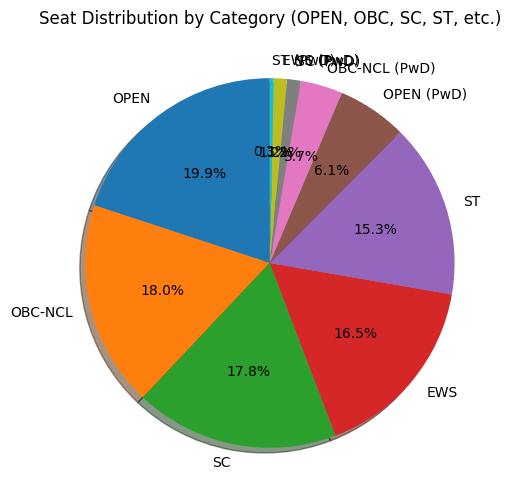

In [14]:
plt.figure(figsize=(6,6))
df["seat_type"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Seat Distribution by Category (OPEN, OBC, SC, ST, etc.)")
plt.ylabel("")
plt.show()

# **Bar Chart - Top 10 Institutes by Number of Programs**

/tmp/ipython-input-1342979104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_institutes.values, y=top_institutes.index, palette="viridis")


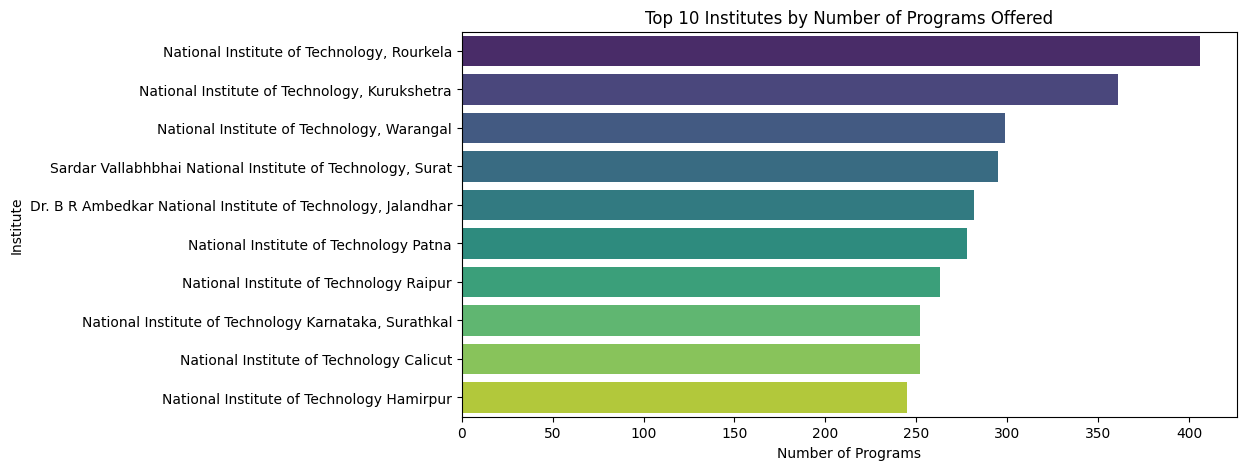

In [18]:
plt.figure(figsize=(10,5))
top_institutes = df["institute"].value_counts().head(10)
sns.barplot(x=top_institutes.values, y=top_institutes.index, palette="viridis")
plt.title("Top 10 Institutes by Number of Programs Offered")
plt.xlabel("Number of Programs")
plt.ylabel("Institute")
plt.show()


# **Boxplot - Closing Rank Distribution by Category**

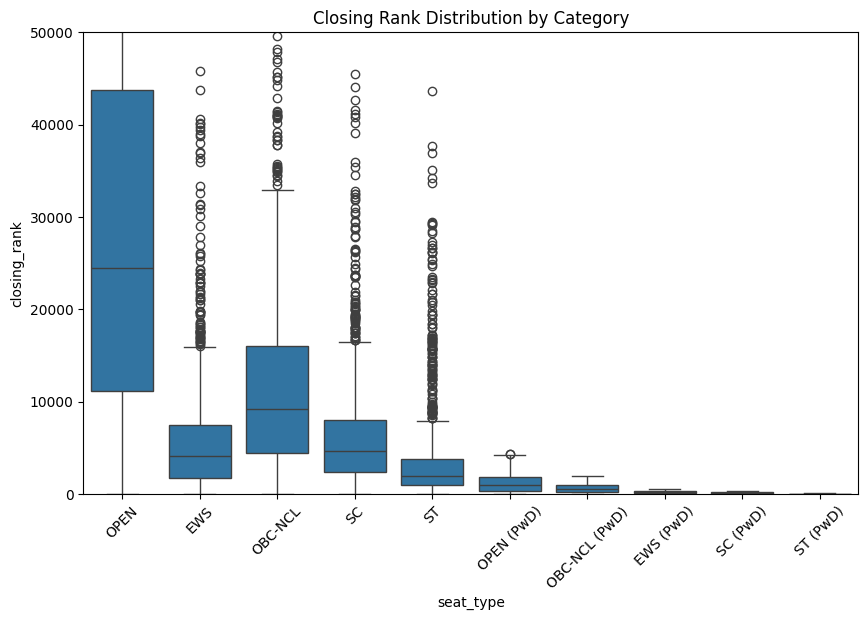

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x="seat_type", y="closing_rank", data=df)
plt.title("Closing Rank Distribution by Category")
plt.xticks(rotation=45)
plt.ylim(0, 50000)  # adjust limit for clarity
plt.show()


# **Line Chart - Round-wise Closing Rank Trend for CSE at IIIT**

/tmp/ipython-input-1283690946.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=iit_cse_grouped.values, y=iit_cse_grouped.index, palette="mako")


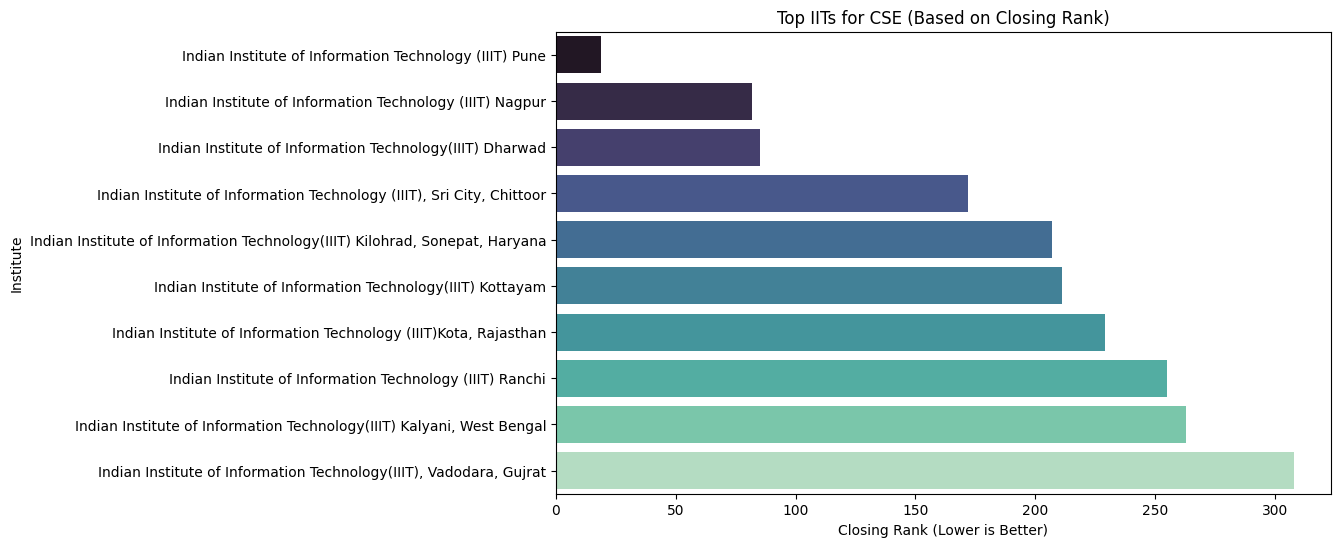

In [22]:
# Example: Closing rank comparison for CSE across top IITs
iit_cse = df[(df["institute"].str.contains("IIT", case=False)) &
             (df["academic_program_name"].str.contains("Computer Science", case=False))]

# Take best closing rank per IIT
iit_cse_grouped = iit_cse.groupby("institute")["closing_rank"].min().sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=iit_cse_grouped.values, y=iit_cse_grouped.index, palette="mako")
plt.title("Top IITs for CSE (Based on Closing Rank)")
plt.xlabel("Closing Rank (Lower is Better)")
plt.ylabel("Institute")
plt.show()


#**Histogram - Closing Rank Distribution**

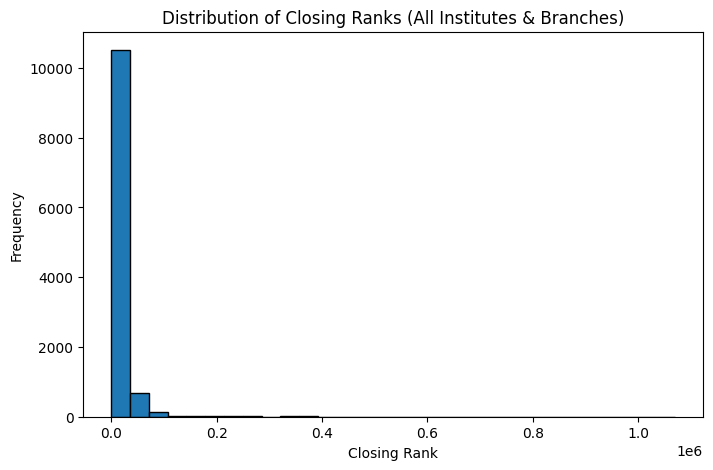

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df["closing_rank"], bins=30, edgecolor="black")
plt.title("Distribution of Closing Ranks (All Institutes & Branches)")
plt.xlabel("Closing Rank")
plt.ylabel("Frequency")
plt.show()
